In [8]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [9]:
pip install pmdarima

In [10]:
df = pd.read_csv('Resources/Datasets/General_factor_data/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv', skiprows=4)
df

,Month,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,Apr 2022,4.213
1,Mar 2022,4.322
2,Feb 2022,3.611
3,Jan 2022,3.413
4,Dec 2021,3.406
...,...,...
344,Aug 1993,1.062
345,Jul 1993,1.078
346,Jun 1993,1.097
347,May 1993,1.100


In [11]:
df = df.rename(columns={'Month':'Date',
    'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon':'All_grade_price($/gallon)'})
df

,Date,All_grade_price($/gallon)
0,Apr 2022,4.213
1,Mar 2022,4.322
2,Feb 2022,3.611
3,Jan 2022,3.413
4,Dec 2021,3.406
...,...,...
344,Aug 1993,1.062
345,Jul 1993,1.078
346,Jun 1993,1.097
347,May 1993,1.100


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df.Date >= '2001-01-01')]
df = df.set_index('Date')
df

,All_grade_price($/gallon)
Date,
2022-04-01,4.213
2022-03-01,4.322
2022-02-01,3.611
2022-01-01,3.413
2021-12-01,3.406
...,...
2001-05-01,1.738
2001-04-01,1.591
2001-03-01,1.450


In [13]:
df = df.sort_index()
df

,All_grade_price($/gallon)
Date,
2001-01-01,1.487
2001-02-01,1.490
2001-03-01,1.450
2001-04-01,1.591
2001-05-01,1.738
...,...
2021-12-01,3.406
2022-01-01,3.413
2022-02-01,3.611


Text(0.5, 1.0, 'Time Series of All_grade_Price')

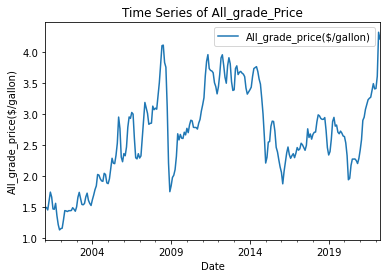

In [14]:
#plot to see data relationship
df.plot()
plt.ylabel('All_grade_price($/gallon)')
plt.title('Time Series of All_grade_Price')

In [15]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['All_grade_price($/gallon)'], autolag = 'AIC')

print('ADF: ', dftest[0])
print('p-value: ', dftest[1])
print('Number of Lags: ', dftest[2])
#check the data if it is stationarity.P-value is 0.67 which is greater than 0.05, 
#which means data is accepting the null hypothesis, which means data is non-stationary. 

ADF:  -2.461160521003401
p-value:  0.12521258269778213
Number of Lags:  2


### ##looking for the min. AIC score

In [16]:
from pmdarima import auto_arima
arima_df = auto_arima(df['All_grade_price($/gallon)'], trace=True,suppress_warnings=True)

arima_df.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-249.457, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-180.322, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-236.409, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-242.960, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-181.299, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-244.672, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-249.369, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-245.466, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-247.615, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-244.047, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-249.994, Time=0.95 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-245.558, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-247.533, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-245.682, Time=0.26 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  256
Model:               SARIMAX(1, 1, 3)   Log Likelihood                 130.997
Date:                Tue, 31 May 2022   AIC                           -249.994
Time:                        20:35:59   BIC                           -228.746
Sample:                             0   HQIC                          -241.447
                                - 256                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020      0.002      0.972      0.331      -0.002       0.006
ar.L1          0.7585      0.126      6.004      0.000       0.511       1.006
ma.L1         -0.2253      0.134     -1.681      0.093      -0.488       0.037
ma.L2         -0.3493      0.070     -5.022      0.000      -0.486      -0.213
ma.L3         -0.2260      0.079     -2.858      0.004      -0.381      -0.071
sigma2         0.0209      0.001     16.003      0.000       0.018       0.023
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                88.21
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.36
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split data to train and test

In [25]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [30]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

SyntaxError: invalid syntax (Temp/ipykernel_23376/1278441833.py, line 4)

In [18]:
print(df.shape)

(256, 1)


In [20]:
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(226, 1) (30, 1)


In [35]:
model = ARIMA(train, order=(1,1,3))
model_f = model.fit(disp=0)
print(model_f.summary())

C:\Users\Phoeb\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Phoeb\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so in

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

### Make a prediction

In [ ]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
pred = model.predict(start = start, end=end, typ='levels')
print(pred)

In [ ]:
#pred.index=df.index[start:end+1]
#print(pred)

In [ ]:
pred.plot(legend=True)
test_data.plot(legend=True)


In [ ]:
import sklearn.metrics as skm
print('MAE =', round(skm.mean_absolute_error(test_data, pred), 2))
print("MSE =", round(skm.mean_squared_error(test_data, pred), 2)) 
print("MAE =", round(skm.median_absolute_error(test_data, pred), 2)) 
print("EVS =", round(skm.explained_variance_score(test_data, pred), 2)) 
print("R2 score =", round(skm.r2_score(test_data, pred), 2))

In [ ]:
rmse = sqrt(mean_squared_error(test_data, pred))
print('rmse: ', rmse)

In [ ]:
#make future predictions, the comming 7days
pred_future = results.predict(start=(len(X)+1), end=(len(X)+30), dynamic=False)
print('The future prediction for the next week')
print(pred_future)
print('Number of prediction make: \t', len(pred_future))